# Denoising auto encoder

The aim of this script is to remove noise of picture

In [1]:
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
from keras.backend import int_shape

Using TensorFlow backend.


In [2]:
#load the data
(ytrain,y1),(ytest,y2) = mnist.load_data()
del y1, y2
ytrain = ytrain.reshape((-1,28,28,1))/255
ytest = ytest.reshape((-1,28,28,1))/255

## Generate noisy vector

In [3]:
#Add noise
noiseTrain = np.random.normal(loc=0.5, scale=0.2, size=ytrain.shape)
noiseTest = np.random.normal(loc=0.5, scale=0.2, size=ytest.shape)

  $Noise \sim \mathcal{N}(0,1)$

In [4]:
xtrain = np.clip(noiseTrain + ytrain, 0., 1.  )
xtest = np.clip(noiseTest + ytest, 0., 1.  )

In [5]:
import matplotlib.pyplot as plt
def viewMinst(mtr,mtr2):
    """view minst"""
    mtr3 = np.concatenate((mtr,mtr2),axis=1)
    plt.imshow(mtr3.reshape(28,2*28), cmap='gray')
    plt.show()

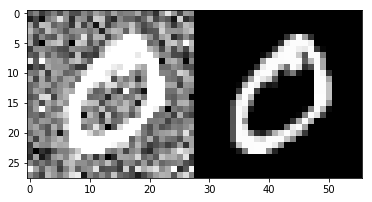

In [8]:
viewMinst(xtrain[1],ytrain[1])

## Model Creation

In [9]:
from keras.layers import MaxPooling2D, Dense, Conv2D, Conv2DTranspose, Input, Flatten, Reshape
from keras.models import Model
from keras.callbacks import TensorBoard

In [10]:
inp = Input(shape=(28,28,1), name='inp')

x = inp

#Encoder Part

filters = [16,32,64]

for f in filters :
    x = Conv2D(kernel_size=3,filters=f,strides=1,padding='same')(x)

shp = int_shape(x)
x = Flatten()(x)

x = Dense(16)(x)

#Decoder Part

x = Dense(shp[1]*shp[2]*shp[3])(x)

x = Reshape((shp[1],shp[2],shp[3]))(x)

for f in filters[::-1]:
    x = Conv2DTranspose(kernel_size=3,strides=1,padding='same',filters=f)(x)


out = Conv2DTranspose(kernel_size=3,strides=1,padding='same',filters=1)(x)
denoiser = Model(inp,out, name='denoiser')


In [11]:
denoiser.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                802832    
_________________________________________________________________
dense_2 (Dense)              (None, 50176)             852992    
__________

In [12]:
denoiser.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
tbd = TensorBoard('D:/')

In [14]:
denoiser.fit(xtrain,ytrain,validation_data=(xtest,ytest), callbacks=[tbd], epochs= 10, batch_size=128 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 523us/step - loss: 0.0294 - acc: 0.8089 - val_loss: 0.0290 - val_acc: 0.8087
Epoch 2/10
60000/60000 [==============================] - 32s 540us/step - loss: 0.0294 - acc: 0.8089 - val_loss: 0.0289 - val_acc: 0.8085
Epoch 3/10
60000/60000 [==============================] - 32s 540us/step - loss: 0.0294 - acc: 0.8089 - val_loss: 0.0289 - val_acc: 0.8086
Epoch 4/10
60000/60000 [==============================] - 32s 542us/step - loss: 0.0294 - acc: 0.8089 - val_loss: 0.0289 - val_acc: 0.8081
Epoch 5/10
60000/60000 [==============================] - 33s 543us/step - loss: 0.0293 - acc: 0.8089 - val_loss: 0.0288 - val_acc: 0.8083
Epoch 6/10
60000/60000 [==============================] - 32s 540us/step - loss: 0.0293 - acc: 0.8089 - val_loss: 0.0289 - val_acc: 0.8079
Epoch 7/10
60000/60000 [==============================] - 32s 537us/step - loss: 0.0293 - acc: 0.8089 - val_loss: 0.

## Check denoised data

In [24]:
def viewMinst2(mtr,mtr2,mtr3):
    """view minst"""
    mtr3 = np.concatenate((mtr,mtr2,mtr3),axis=1)
    plt.imshow(mtr3.reshape(28,3*28), cmap='gray')
    plt.show()

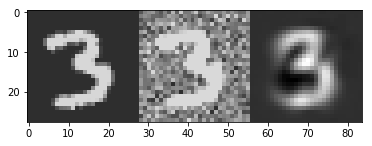

In [30]:
pred = denoiser.predict(xtest)
viewMinst2(ytest[500],xtest[500],pred[500])